In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [69]:
data = pd.read_csv("archive/train.csv")

In [70]:
data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [72]:
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [73]:
data.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

Data Cleaning

In [74]:
data["ADDRESS"]= data["ADDRESS"].str.split(",").str[-1]
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,Bangalore,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,Mysore,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,Bangalore,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,Ghaziabad,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,Kolkata,22.592200,88.484911,60.5


In [75]:

def column_contribution_calculateion(dff):
    df = pd.DataFrame(dff)

    # Ensure all columns are numeric
    df = df.apply(pd.to_numeric, errors='coerce')

    # Calculate the total sum of all columns
    total_sum = df.sum().sum()

    # Calculate percentage contribution for each column
    column_sums = df.sum()
    percentage_contribution = (column_sums / total_sum) * 100
    return (percentage_contribution)

print(column_contribution_calculateion(data))


POSTED_BY                 0.000000
UNDER_CONSTRUCTION        0.000897
RERA                      0.001586
BHK_NO.                   0.011933
BHK_OR_RK                 0.000000
SQUARE_FT                98.774549
READY_TO_MOVE             0.004091
RESALE                    0.004637
ADDRESS                   0.000000
LONGITUDE                 0.106247
LATITUDE                  0.383272
TARGET(PRICE_IN_LACS)     0.712789
dtype: float64


In [76]:
print(data['ADDRESS'].unique())

['Bangalore' 'Mysore' 'Ghaziabad' 'Kolkata' 'Kochi' 'Jaipur' 'Mohali'
 'Chennai' 'Siliguri' 'Noida' 'Raigad' 'Bhubaneswar' 'Wardha' 'Pune'
 'Mumbai' 'Nagpur' 'Deoghar' 'Bhiwadi' 'Faridabad' 'Lalitpur'
 'Maharashtra' 'Vadodara' 'Visakhapatnam' 'Vapi' 'Mangalore' 'Aurangabad'
 'Ottapalam' 'Vijayawada' 'Belgaum' 'Bhopal' 'Lucknow' 'Kanpur'
 'Gandhinagar' 'Pondicherry' 'Agra' 'Ranchi' 'Gurgaon' 'Udupi' 'Indore'
 'Jodhpur' 'Coimbatore' 'Valsad' 'Palghar' 'Surat' 'Varanasi' 'Guwahati'
 'Amravati' 'Anand' 'Tirupati' 'Secunderabad' 'Raipur' 'Vizianagaram'
 'Thrissur' 'Satna' 'Madurai' 'Chandigarh' 'Shimla' 'Gwalior' 'Rajkot'
 'Sonipat' 'Allahabad' 'Berhampur' 'Roorkee' 'Dharuhera' 'Latur'
 'Durgapur' 'Panchkula' 'Solapur' 'Durg' 'Goa' 'Jamshedpur' 'Hazaribagh'
 'Jabalpur' 'Hosur' 'Morbi' 'Hubli' 'Karnal' 'Patna' 'Bilaspur'
 'Ratnagiri' 'Meerut' 'Kotdwara' 'Jalandhar' 'Amritsar' 'Patiala'
 'Ludhiana' 'Alwar' 'Kota' 'Panaji' 'Kolhapur' 'Ernakulam' 'Bhavnagar'
 'Bharuch' 'Asansol' 'Jhansi' 'Marga

In [28]:
# maharashtra_df = data[data['ADDRESS'].isin(['Maharashtra'])]
# counts = maharashtra_df['ADDRESS'].value_counts()

# print(counts)

ADDRESS
Maharashtra    1579
Name: count, dtype: int64


In [77]:
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune']:
        return 'tier1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
                  'Haldia','Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
                  'Vellore', 'Warangal']:
        return 'tier2'
    else:
        return 'tier3'

data['city_tier'] = data['ADDRESS'].apply(map_city)

In [35]:
# df =  pd.DataFrame(data)  
# df['State'] = np.where(
#     df['ADDRESS'].isin(['Bangalore', 'Mysore', 'Mangalore', 'Belgaum', 'Udupi', 'Hassan', 'Hubli', 'Dharwad', 'Karwar']), 'Karnataka',
#     np.where(df['ADDRESS'].isin(['Ghaziabad', 'Noida', 'Lucknow', 'Kanpur', 'Agra', 'Lalitpur', 'Meerut', 'Jhansi', 'Allahabad', 'Bareilly', 'Mathura', 'Aligarh']), 'Uttar Pradesh',
#     np.where(df['ADDRESS'].isin(['Kolkata', 'Siliguri', 'Asansol', 'Midnapore', 'Bardhaman', 'Darjeeling', 'Haldia', 'Bankura']), 'West Bengal',
#     np.where(df['ADDRESS'].isin(['Kochi', 'Ottapalam', 'Thrissur', 'Palakkad', 'Kannur', 'Kottayam', 'Kollam', 'Pathanamthitta', 'Idukki', 'Ernakulam', 'Malappuram']), 'Kerala',
#     np.where(df['ADDRESS'].isin(['Jaipur', 'Jodhpur', 'Kota', 'Bhiwadi', 'Alwar', 'Ajmer', 'Jhunjhunu', 'Udaipur', 'Bikaner', 'Nagaur', 'Pali']), 'Rajasthan',
#     np.where(df['ADDRESS'].isin(['Mohali', 'Jalandhar', 'Amritsar', 'Ludhiana', 'Patiala', 'Rajpura']), 'Punjab',
#     np.where(df['ADDRESS'].isin(['Chennai', 'Coimbatore', 'Madurai', 'Tirunelveli', 'Salem', 'Pudukkottai', 'Erode', 'Ooty', 'Thanjavur', 'Karaikudi', 'Vellore', 'Cuddalore']), 'Tamil Nadu',
#     np.where(df['ADDRESS'].isin(['Pune', 'Mumbai', 'Nagpur', 'Aurangabad', 'Raigad', 'Wardha', 'Palghar', 'Amravati', 'Jalgaon', 'Solapur', 'Ratnagiri', 'Kolhapur', 'Ahmednagar', 'Jalna', 'Akola', 'Bhandara', 'Chandrapur', 'Osmanabad', 'Yavatmal', 'Gondia', 'Washim', 'Beed', 'Shirdi']), 'Maharashtra',
#     np.where(df['ADDRESS'].isin(['Patna', 'Muzaffarpur', 'Hajipur', 'Gaya', 'Darbhanga', 'Bhagalpur', 'Arrah']), 'Bihar',
#     np.where(df['ADDRESS'].isin(['Bhubaneswar', 'Berhampur', 'Cuttack', 'Rourkela', 'Rayagada', 'Balasore', 'Jharsuguda', 'Jajpur', 'Angul', 'Sambalpur', 'Bhadrak']), 'Odisha',
#     np.where(df['ADDRESS'].isin(['Bhopal', 'Indore', 'Gwalior', 'Satna', 'Jabalpur', 'Ujjain', 'Vidisha', 'Chhindwara', 'Rewa', 'Hoshangabad', 'Betul', 'Raisen', 'Sagar']), 'Madhya Pradesh',
#     np.where(df['ADDRESS'].isin(['Faridabad', 'Gurgaon', 'Sonipat', 'Panchkula', 'Bahadurgarh', 'Bhiwani', 'Karnal', 'Ambala', 'Rohtak', 'Rewari', 'Hisar']), 'Haryana',
#     np.where(df['ADDRESS'].isin(['Gandhinagar', 'Vadodara', 'Surat', 'Rajkot', 'Anand', 'Bhavnagar', 'Bharuch', 'Vapi', 'Valsad', 'Navsari', 'Jamnagar', 'Kadi', 'Morbi', 'Junagadh', 'Godhra', 'Sabarkantha', 'Dahod', 'Nadiad', 'Bhuj', 'Palanpur', 'Surendranagar', 'Visnagar']), 'Gujarat',
#     np.where(df['ADDRESS'].isin(['Visakhapatnam', 'Vijayawada', 'Tirupati', 'Secunderabad', 'Vizianagaram', 'Nellore', 'Guntur', 'Kakinada', 'Eluru', 'Anantapur', 'Bhimavaram', 'Machilipatnam', 'Tenali', 'Ongole', 'Rajahmundry', 'Kurnool', 'Kadapa']), 'Andhra Pradesh',
#     np.where(df['ADDRESS'].isin(['Raipur', 'Bilaspur', 'Korba', 'Raigarh', 'Rajnandgaon', 'Durg', 'Bhilai']), 'Chhattisgarh',
#     np.where(df['ADDRESS'].isin(['Hyderabad', 'Warangal', 'Siddipet', 'Nizamabad']), 'Telangana',
#     np.where(df['ADDRESS'].isin(['Guwahati', 'Dibrugarh', 'Silchar']), 'Assam',
#     np.where(df['ADDRESS'].isin(['Panaji', 'Margao']), 'Goa',
#     np.where(df['ADDRESS'].isin(['Shimla', 'Solan', 'Baddi']), 'Himachal Pradesh',
#     np.where(df['ADDRESS'].isin(['Ranchi', 'Jamshedpur', 'Hazaribagh', 'Dhanbad', 'Bokaro']), 'Jharkhand',
#     np.where(df['ADDRESS'].isin(['Dehradun', 'Roorkee', 'Haridwar', 'Nainital', 'Haldwani', 'Rudrapur', 'Kotdwara', 'Rishikesh']), 'Uttarakhand',
#     np.where(df['ADDRESS'].isin(['Srinagar', 'Jammu']), 'Jammu and Kashmir',
#     np.where(df['ADDRESS'].isin(['Agartala']), 'Tripura',
#     np.where(df['ADDRESS'].isin(['Chandigarh']), 'Chandigarh (Union Territory)',
#     np.where(df['ADDRESS'].isin(['Pondicherry']), 'Pondicherry (Union Territory)',
#     'Other')))))))))))))))))))))))))

In [41]:
# print(column_contribution_calculateion(df))

UNDER_CONSTRUCTION        0.000901
RERA                      0.001594
BHK_NO.                   0.011992
SQUARE_FT                99.260448
READY_TO_MOVE             0.004112
RESALE                    0.004660
TARGET(PRICE_IN_LACS)     0.716295
State                     0.000000
dtype: float64


In [37]:
# df.drop(columns=["LONGITUDE","LATITUDE"],inplace = True)

In [40]:
# df.drop(columns=["POSTED_BY","BHK_OR_RK","ADDRESS"],inplace = True)

In [78]:
print(column_contribution_calculateion(data))

POSTED_BY                 0.000000
UNDER_CONSTRUCTION        0.000897
RERA                      0.001586
BHK_NO.                   0.011933
BHK_OR_RK                 0.000000
SQUARE_FT                98.774549
READY_TO_MOVE             0.004091
RESALE                    0.004637
ADDRESS                   0.000000
LONGITUDE                 0.106247
LATITUDE                  0.383272
TARGET(PRICE_IN_LACS)     0.712789
city_tier                 0.000000
dtype: float64


In [ ]:
# def map_state(city):
#     if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune']:
#         return 'tier1'
#     elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
#                   'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
#                   'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
#                   'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
#                   'Haldia','Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
#                   'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
#                   'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
#                   'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
#                   'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
#                   'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
#                   'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
#                   'Vellore', 'Warangal']:
#         return 'tier2'

BHK_OR_RK
BHK    29427
RK        24
Name: count, dtype: int64


<BarContainer object of 2 artists>

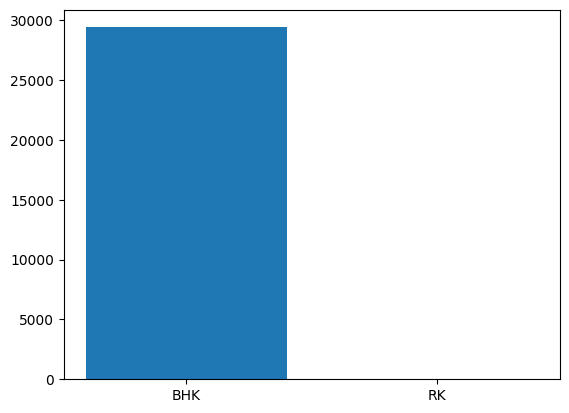

In [50]:
print(data["BHK_OR_RK"].value_counts())
plt.bar(["BHK","RK"],data["BHK_OR_RK"].value_counts())

In [79]:
data.drop(['POSTED_BY',"BHK_OR_RK","ADDRESS",], axis=1, inplace = True)
data.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city_tier
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,tier1
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,tier2
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,tier1
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,tier2
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,tier1


In [80]:
data["LONGITUDE"],data["LATITUDE"]=data["LATITUDE"],data["LONGITUDE"]
data.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city_tier
0,0,0,2,1300.236407,1,1,77.597960,12.969910,55.0,tier1
1,0,0,2,1275.000000,1,1,76.644605,12.274538,51.0,tier2
2,0,0,2,933.159722,1,1,77.632191,12.778033,43.0,tier1
3,0,1,2,929.921143,1,1,77.344500,28.642300,62.5,tier2
4,1,0,2,999.009247,0,1,88.484911,22.592200,60.5,tier1


In [81]:
data=data[data["LONGITUDE"].between(68,97) & data["LATITUDE"].between(8,37)]

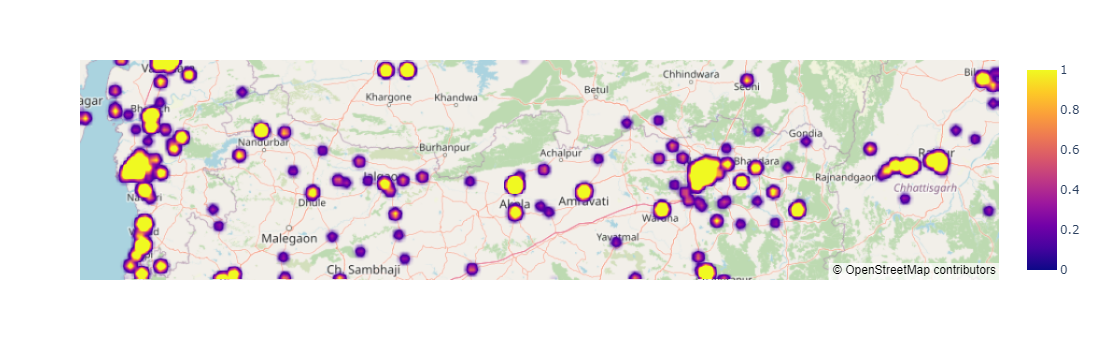

In [82]:
fig = px.density_mapbox(data,  lon = 'LONGITUDE',lat = 'LATITUDE',
                        radius = 8,
                        zoom = 6,
                        mapbox_style = 'open-street-map')
fig.show()

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29193 entries, 0 to 29450
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNDER_CONSTRUCTION     29193 non-null  int64  
 1   RERA                   29193 non-null  int64  
 2   BHK_NO.                29193 non-null  int64  
 3   SQUARE_FT              29193 non-null  float64
 4   READY_TO_MOVE          29193 non-null  int64  
 5   RESALE                 29193 non-null  int64  
 6   LONGITUDE              29193 non-null  float64
 7   LATITUDE               29193 non-null  float64
 8   TARGET(PRICE_IN_LACS)  29193 non-null  float64
 9   city_tier              29193 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 2.4+ MB


UNDER_CONSTRUCTION
0    23921
1     5272
Name: count, dtype: int64


<BarContainer object of 2 artists>

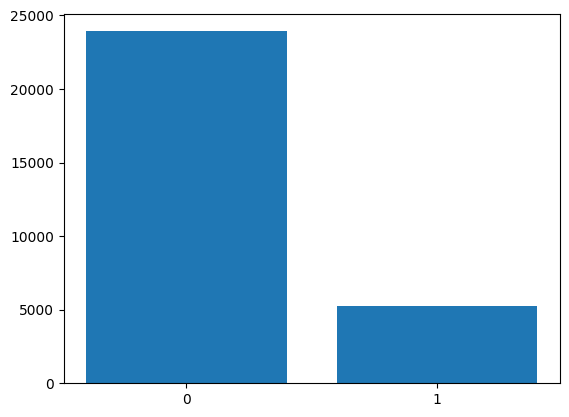

In [84]:
print(data['UNDER_CONSTRUCTION'].value_counts())
plt.bar(["0","1"],data["UNDER_CONSTRUCTION"].value_counts())

RERA
0    19858
1     9335
Name: count, dtype: int64


<BarContainer object of 2 artists>

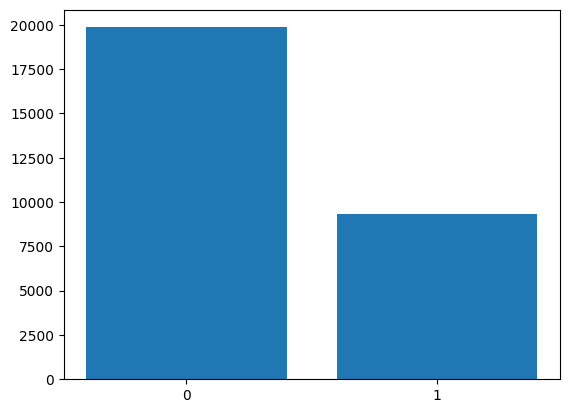

In [85]:
print(data['RERA'].value_counts())
plt.bar(["0","1"],data["RERA"].value_counts())

In [86]:
print(data['BHK_NO.'].value_counts())
#plt.bar(["0","1"],data["RERA"].value_counts())

BHK_NO.
2     13207
3     10442
1      3553
4      1708
5       189
6        52
7        11
8        10
20        4
10        4
15        4
12        3
9         3
13        1
17        1
11        1
Name: count, dtype: int64


In [88]:
# Filter out rows where BHK_NO. count is less than 10
data = data.groupby('BHK_NO.').filter(lambda x: len(x) >= 10)

# Print filtered value counts
print("\nFiltered value counts:")
print(data['BHK_NO.'].value_counts())


Filtered value counts:
BHK_NO.
2    13207
3    10442
1     3553
4     1708
5      189
6       52
7       11
8       10
Name: count, dtype: int64


In [89]:
print(data['SQUARE_FT'].value_counts())

SQUARE_FT
1000.000000    476
1250.000000    289
800.000000     202
1200.000000    176
1600.000000    122
              ... 
1635.198921      1
1655.115341      1
2102.631579      1
620.113238       1
896.774194       1
Name: count, Length: 19402, dtype: int64


In [90]:
data['TARGET(PRICE_IN_LACS)'] = data['TARGET(PRICE_IN_LACS)']  * 100000

In [91]:
data

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city_tier
0,0,0,2,1300.236407,1,1,77.597960,12.969910,5500000.0,tier1
1,0,0,2,1275.000000,1,1,76.644605,12.274538,5100000.0,tier2
2,0,0,2,933.159722,1,1,77.632191,12.778033,4300000.0,tier1
3,0,1,2,929.921143,1,1,77.344500,28.642300,6250000.0,tier2
4,1,0,2,999.009247,0,1,88.484911,22.592200,6050000.0,tier1
...,...,...,...,...,...,...,...,...,...,...
29445,0,0,2,1062.134891,1,1,74.500000,15.866670,4000000.0,tier2
29446,0,0,3,2500.000000,1,1,78.043277,27.140626,4500000.0,tier2
29448,0,0,2,1022.641509,1,1,75.828002,26.928785,2710000.0,tier2
29449,0,0,2,927.079009,1,1,80.227910,12.900150,6700000.0,tier1


In [92]:
data.loc[:, 'price_per_sqft'] = data['TARGET(PRICE_IN_LACS)'] / data['SQUARE_FT']

In [93]:
data

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),city_tier,price_per_sqft
0,0,0,2,1300.236407,1,1,77.597960,12.969910,5500000.0,tier1,4229.999999
1,0,0,2,1275.000000,1,1,76.644605,12.274538,5100000.0,tier2,4000.000000
2,0,0,2,933.159722,1,1,77.632191,12.778033,4300000.0,tier1,4608.000000
3,0,1,2,929.921143,1,1,77.344500,28.642300,6250000.0,tier2,6721.000000
4,1,0,2,999.009247,0,1,88.484911,22.592200,6050000.0,tier1,6056.000000
...,...,...,...,...,...,...,...,...,...,...,...
29445,0,0,2,1062.134891,1,1,74.500000,15.866670,4000000.0,tier2,3766.000000
29446,0,0,3,2500.000000,1,1,78.043277,27.140626,4500000.0,tier2,1800.000000
29448,0,0,2,1022.641509,1,1,75.828002,26.928785,2710000.0,tier2,2650.000001
29449,0,0,2,927.079009,1,1,80.227910,12.900150,6700000.0,tier1,7227.000000


In [94]:
data['price_per_sqft'].describe()

count     29172.000000
mean       7510.760387
std       10879.766875
min           1.000000
25%        3548.000001
50%        5096.000000
75%        8070.999999
max      900000.000000
Name: price_per_sqft, dtype: float64

In [95]:
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),price_per_sqft
count,29172.000000,29172.000000,29172.000000,2.917200e+04,29172.000000,29172.000000,29172.000000,29172.000000,2.917200e+04,29172.000000
mean,0.180618,0.319999,2.383758,1.997311e+04,0.819382,0.929213,77.267989,21.161615,1.431392e+07,7510.760387
std,0.384708,0.466484,0.821759,1.910405e+06,0.384708,0.256473,4.147265,5.863088,6.598013e+07,10879.766875
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,69.104114,8.513294,2.500000e+04,1.000000
25%,0.000000,0.000000,2.000000,9.000000e+02,1.000000,1.000000,73.808940,18.448175,3.800000e+06,3548.000001
50%,0.000000,0.000000,2.000000,1.173283e+03,1.000000,1.000000,77.326457,20.461950,6.180000e+06,5096.000000
75%,0.000000,1.000000,3.000000,1.550169e+03,1.000000,1.000000,77.786000,26.862600,1.000000e+07,8070.999999
max,1.000000,1.000000,8.000000,2.545455e+08,1.000000,1.000000,95.000000,34.552275,3.000000e+09,900000.000000


In [96]:
data.rename(columns={'BHK_NO.': 'BHK'}, inplace=True)
data.rename(columns={'TARGET(PRICE_IN_LACS)': 'Target'}, inplace=True)
data

,UNDER_CONSTRUCTION,RERA,BHK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Target,city_tier,price_per_sqft
0,0,0,2,1300.236407,1,1,77.597960,12.969910,5500000.0,tier1,4229.999999
1,0,0,2,1275.000000,1,1,76.644605,12.274538,5100000.0,tier2,4000.000000
2,0,0,2,933.159722,1,1,77.632191,12.778033,4300000.0,tier1,4608.000000
3,0,1,2,929.921143,1,1,77.344500,28.642300,6250000.0,tier2,6721.000000
4,1,0,2,999.009247,0,1,88.484911,22.592200,6050000.0,tier1,6056.000000
...,...,...,...,...,...,...,...,...,...,...,...
29445,0,0,2,1062.134891,1,1,74.500000,15.866670,4000000.0,tier2,3766.000000
29446,0,0,3,2500.000000,1,1,78.043277,27.140626,4500000.0,tier2,1800.000000
29448,0,0,2,1022.641509,1,1,75.828002,26.928785,2710000.0,tier2,2650.000001
29449,0,0,2,927.079009,1,1,80.227910,12.900150,6700000.0,tier1,7227.000000


In [97]:
(data['SQUARE_FT']/data['BHK']).describe()

count    2.917200e+04
mean     7.267847e+03
std      6.606675e+05
min      1.500000e+00
25%      4.500212e+02
50%      5.312149e+02
75%      6.125151e+02
max      8.484848e+07
dtype: float64

In [98]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key,  subdf in df.groupby('city_tier'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft < (m+st))]
        df_output = pd.concat([df_output,gen_df],ignore_index = True)

    return df_output

data = remove_outliers_sqft(data)
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Target,price_per_sqft
count,27406.000000,27406.000000,27406.000000,27406.000000,27406.000000,27406.000000,27406.000000,27406.000000,2.740600e+04,27406.000000
mean,0.175181,0.311830,2.366745,1919.541621,0.824819,0.932679,77.468724,21.252785,1.178118e+07,6036.697074
std,0.380128,0.463249,0.803042,11438.324136,0.380128,0.250582,4.136762,5.983274,5.738509e+07,3844.840838
min,0.000000,0.000000,1.000000,90.252708,0.000000,0.000000,69.104114,8.513294,2.500000e+04,4.000000
25%,0.000000,0.000000,2.000000,900.163666,1.000000,1.000000,73.941670,17.731017,3.600000e+06,3482.250000
50%,0.000000,0.000000,2.000000,1174.056342,1.000000,1.000000,77.351104,21.147280,5.820000e+06,4889.000002
75%,0.000000,1.000000,3.000000,1543.421828,1.000000,1.000000,78.068793,26.906061,9.500000e+06,7286.749998
max,1.000000,1.000000,8.000000,875000.000000,1.000000,1.000000,95.000000,34.091110,9.990000e+08,23418.000002


In [99]:
def bhk_outliers_remover(df):
    ex_indices = np.array([])
    for loc,loc_df in df.groupby('city_tier'):
        bhk_stats = {}
        for bhk,bhk_df in loc_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }

        for bhk,bhk_df in loc_df.groupby('BHK'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count']>5:
                ex_indices = np.append(ex_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)

    return df.drop(ex_indices,axis='index')

data = remove_outliers_sqft(data)
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Target,price_per_sqft
count,20060.000000,20060.000000,20060.000000,20060.000000,20060.000000,20060.000000,20060.000000,20060.000000,2.006000e+04,20060.000000
mean,0.172931,0.318445,2.350847,1746.091539,0.827069,0.940578,77.503011,21.136410,9.656570e+06,5307.424526
std,0.378197,0.465885,0.775669,8494.281505,0.378197,0.236418,3.927798,6.160595,5.017822e+07,2270.418773
min,0.000000,0.000000,1.000000,152.012648,0.000000,0.000000,69.104114,8.513294,6.000000e+05,2336.999999
25%,0.000000,0.000000,2.000000,925.094048,1.000000,1.000000,74.735239,15.450560,3.940000e+06,3691.000000
50%,0.000000,0.000000,2.000000,1179.889009,1.000000,1.000000,77.367514,21.111835,5.660000e+06,4767.500000
75%,0.000000,1.000000,3.000000,1508.120650,1.000000,1.000000,78.101696,26.916670,8.200000e+06,6268.999999
max,1.000000,1.000000,8.000000,246008.783300,1.000000,1.000000,95.000000,34.091110,9.790000e+08,14296.000000


In [100]:
data = remove_outliers_sqft(data)
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Target,price_per_sqft
count,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,12433.000000,1.243300e+04,12433.000000
mean,0.182498,0.332824,2.343119,1765.286768,0.817502,0.941848,77.548070,21.040364,9.111958e+06,5103.587710
std,0.386270,0.471243,0.764302,9175.771436,0.386270,0.234039,3.861112,6.236699,4.916699e+07,1620.757037
min,0.000000,0.000000,1.000000,152.012648,0.000000,0.000000,69.104114,8.513294,8.000000e+05,2914.000000
25%,0.000000,0.000000,2.000000,935.143288,1.000000,1.000000,75.000000,13.650000,4.170000e+06,3813.000001
50%,0.000000,0.000000,2.000000,1180.134404,1.000000,1.000000,77.369936,21.000000,5.700000e+06,4761.000000
75%,0.000000,1.000000,3.000000,1500.214316,1.000000,1.000000,78.416000,26.900926,7.800000e+06,6059.999998
max,1.000000,1.000000,8.000000,246008.783300,1.000000,1.000000,95.000000,32.537765,9.700000e+08,10328.000004


In [101]:
print(column_contribution_calculateion(data))

UNDER_CONSTRUCTION     0.000002
RERA                   0.000004
BHK                    0.000026
SQUARE_FT              0.019358
READY_TO_MOVE          0.000009
RESALE                 0.000010
LONGITUDE              0.000850
LATITUDE               0.000231
Target                99.923543
city_tier              0.000000
price_per_sqft         0.055967
dtype: float64


In [128]:
data.drop(columns=["price_per_sqft","LONGITUDE","LATITUDE","city_tier"],inplace=True)

In [129]:
data

,UNDER_CONSTRUCTION,RERA,BHK,SQUARE_FT,READY_TO_MOVE,RESALE,Target
0,0,0,2,933.159722,1,1,4300000.0
1,1,0,2,999.009247,0,1,6050000.0
2,0,0,2,927.177902,1,1,4800000.0
3,0,1,3,2178.649237,1,1,12000000.0
4,0,0,2,881.143529,1,1,4500000.0
...,...,...,...,...,...,...,...
12428,1,1,3,1563.155686,0,1,7450000.0
12429,0,0,5,2249.913465,1,1,13000000.0
12430,0,1,2,1350.007105,1,1,9500000.0
12431,0,1,2,999.070632,1,1,8600000.0


In [130]:
print(column_contribution_calculateion(data))

UNDER_CONSTRUCTION     0.000002
RERA                   0.000004
BHK                    0.000026
SQUARE_FT              0.019370
READY_TO_MOVE          0.000009
RESALE                 0.000010
Target                99.980580
dtype: float64


In [131]:
data.to_csv("Indian_Metropolitan_house_price_data.csv")

In [132]:
X=data.drop(columns=["Target"])
y=data['Target']

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [135]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9946, 6)
(9946,)
(2487, 6)
(2487,)


In [136]:
print(X_train)
print(X_test)

       UNDER_CONSTRUCTION  RERA  BHK    SQUARE_FT  READY_TO_MOVE  RESALE
8138                    0     1    3  1540.029112              1       1
4484                    0     0    3  1600.000000              1       1
2646                    0     0    1   502.067336              1       1
11899                   0     1    1   719.957650              1       1
11476                   1     1    2   684.121622              0       0
...                   ...   ...  ...          ...            ...     ...
4859                    1     1    4  2300.272075              0       1
3264                    0     0    2  1116.990006              1       1
9845                    1     1    2  1094.890511              0       1
10799                   0     1    3  1622.405713              1       1
2732                    0     0    2  1020.110755              1       1

[9946 rows x 6 columns]
       UNDER_CONSTRUCTION  RERA  BHK    SQUARE_FT  READY_TO_MOVE  RESALE
5019                    1 

In [113]:
# column_trans = make_column_transformer(
#     (OneHotEncoder(), ['city_tier']),
#     remainder='passthrough',force_int_remainder_cols=False
# )

In [137]:
scalar = StandardScaler(with_mean=False)

In [138]:
lr = LinearRegression()

In [139]:
pipe = make_pipeline(scalar,lr)

In [140]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [141]:
Y_pred_lr = pipe.predict(X_test)

In [142]:
r2_score(y_test,Y_pred_lr)

0.9718485815369781

In [143]:
print(X)

       UNDER_CONSTRUCTION  RERA  BHK    SQUARE_FT  READY_TO_MOVE  RESALE
0                       0     0    2   933.159722              1       1
1                       1     0    2   999.009247              0       1
2                       0     0    2   927.177902              1       1
3                       0     1    3  2178.649237              1       1
4                       0     0    2   881.143529              1       1
...                   ...   ...  ...          ...            ...     ...
12428                   1     1    3  1563.155686              0       1
12429                   0     0    5  2249.913465              1       1
12430                   0     1    2  1350.007105              1       1
12431                   0     1    2   999.070632              1       1
12432                   0     1    2  1265.094882              1       1

[12433 rows x 6 columns]


In [144]:
dtr = DecisionTreeRegressor()

In [145]:
pipe = make_pipeline(scalar,dtr)

In [146]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [147]:
Y_pred_dtr = pipe.predict(X_test)

In [148]:
r2_score(y_test,Y_pred_dtr)

0.9890167665742552

In [149]:
rfr = RandomForestRegressor()

In [150]:
pipe = make_pipeline(scalar,rfr)

In [151]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('randomforestregressor', RandomForestRegressor())])

In [152]:
Y_pred_rfr = pipe.predict(X_test)

In [153]:
r2_score(y_test,Y_pred_rfr)

0.9900986199754563

In [154]:
print('No reg:',r2_score(y_test,Y_pred_lr))
print('DecisionTreeRegressor:',r2_score(y_test,Y_pred_dtr))
print('RandomForestRegressor:',r2_score(y_test,Y_pred_rfr))

No reg: 0.9718485815369781
DecisionTreeRegressor: 0.9890167665742552
RandomForestRegressor: 0.9900986199754563


In [155]:
import pickle

In [156]:
pickle.dump(pipe,open('RandomForestModel.pkl','wb'))

In [157]:
test_data = pd.read_csv("archive/test.csv")

In [136]:
test_data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670


In [137]:
test_data["ADDRESS"]= test_data["ADDRESS"].str.split(",").str[-1]
test_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,Surat,21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,Lalitpur,18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,Kolkata,22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,Jaipur,26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,Nadiad,22.700000,72.870000


In [138]:
test_data['city_tier'] = test_data['ADDRESS'].apply(map_city)
test_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,city_tier
0,Owner,0,0,1,BHK,545.171340,1,1,Surat,21.262000,73.047700,tier2
1,Dealer,1,1,2,BHK,800.000000,0,0,Lalitpur,18.966114,73.148278,tier3
2,Dealer,0,0,2,BHK,1257.096513,1,1,Kolkata,22.592200,88.484911,tier1
3,Dealer,0,0,3,BHK,1400.329489,1,1,Jaipur,26.988300,75.584600,tier2
4,Owner,0,0,1,BHK,430.477830,1,1,Nadiad,22.700000,72.870000,tier3


In [140]:
test_data.drop(columns=["LONGITUDE","LATITUDE","UNDER_CONSTRUCTION","RERA","READY_TO_MOVE","RESALE"],inplace = True)
test_data.head()

,POSTED_BY,BHK_NO.,BHK_OR_RK,SQUARE_FT,ADDRESS,city_tier
0,Owner,1,BHK,545.171340,Surat,tier2
1,Dealer,2,BHK,800.000000,Lalitpur,tier3
2,Dealer,2,BHK,1257.096513,Kolkata,tier1
3,Dealer,3,BHK,1400.329489,Jaipur,tier2
4,Owner,1,BHK,430.477830,Nadiad,tier3


In [141]:
test_data.drop(columns=["BHK_OR_RK","POSTED_BY","ADDRESS"],inplace = True)
test_data.head()

,BHK_NO.,SQUARE_FT,city_tier
0,1,545.171340,tier2
1,2,800.000000,tier3
2,2,1257.096513,tier1
3,3,1400.329489,tier2
4,1,430.477830,tier3


In [142]:
test_data.rename(columns={'BHK_NO.': 'BHK'}, inplace=True)
test_data.head()

,BHK,SQUARE_FT,city_tier
0,1,545.171340,tier2
1,2,800.000000,tier3
2,2,1257.096513,tier1
3,3,1400.329489,tier2
4,1,430.477830,tier3


In [143]:
X.head()

,BHK,SQUARE_FT,city_tier
0,2,933.159722,tier1
1,2,999.009247,tier1
2,2,927.177902,tier1
3,3,2178.649237,tier1
4,2,881.143529,tier1


In [144]:
y_pred = pipe.predict(test_data)

In [145]:
print(y_pred)

[ 1979900.         6766352.3948274  8063900.        ... 68370000.
  6932200.        14350000.       ]
